In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.io import read_image

In [2]:
#pointless now
#datasets dont need gpus to function but usually on top
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
RANDOM_SEED = 42
DEVICE

'cpu'

In [3]:
class LeBirbs(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.image_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.img_labels.iloc[idx]['image_path']
        img_path = img_path[1:]
        img_path = os.path.join(self.image_dir,img_path)
        print(img_path)
        image = read_image(img_path)
        label = self.img_labels.iloc[idx]['label']
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [4]:
#initiate the dataset object
train_dataset = LeBirbs('train_images.csv','train_images',None,None)
test_dataset = LeBirbs('test_images_path.csv','test_images',None,None)

train_images\train_images/1.jpg
1


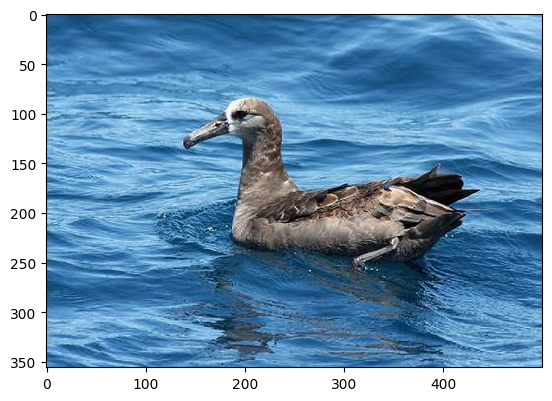

In [6]:
#individual images can be indexed as follows
#returns a tensor RGB 3-channel image
img,label = train_dataset[0]
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')
print(label)

In [7]:
#what si actuallt used in trianing
train_dataloader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=64,shuffle=True)